# Association Analysis
 
## Apriori Algorithm in R

In R, the apriori algorithm is implemented on the <i> arules </i> package.
 
This package comes with some datasets that are suitable to apply association rules analysis. We will use the Groceries dataset. It contains real life grocery transactions. The data is formatted in a special class format called <i> transactions </i>. This format has a complex structure that is manipulated using special functions.
 
To be able to visualize this dataset, we will also use the <i>arulesViz</i> package.

In [1]:
library(arules)
library(arulesViz)

data(Mushroom)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



In [2]:
class(Mushroom)

[1] "transactions"
attr(,"package")
[1] "arules"

In [4]:
str(Mushroom)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:178360] 1 7 10 16 23 30 34 35 38 43 ...
  .. .. ..@ p       : int [1:8125] 0 22 45 68 90 112 135 158 180 202 ...
  .. .. ..@ Dim     : int [1:2] 114 8124
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	114 obs. of  3 variables:
  .. ..$ labels   : chr [1:114] "Class=edible" "Class=poisonous" "CapShape=bell" "CapShape=conical" ...
  .. ..$ variables: Factor w/ 23 levels "Bruises","CapColor",..: 5 5 3 3 3 3 3 3 4 4 ...
  .. ..$ levels   : Factor w/ 63 levels "almond","anise",..: 19 47 4 15 26 33 56 16 23 32 ...
  ..@ itemsetInfo:'data.frame':	8124 obs. of  0 variables


In [5]:
### Lets see how many transactions the dataset has
length(Mushroom)

[1] 8124

In [6]:
inspect(Mushroom)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
inspect(Mushroom[1:5])

    items                    
[1] {Class=poisonous,        
     CapShape=convex,        
     CapSurf=smooth,         
     CapColor=brown,         
     Bruises=bruises,        
     Odor=pungent,           
     GillAttached=free,      
     GillSpace=close,        
     GillSize=narrow,        
     GillColor=black,        
     StalkShape=enlarging,   
     StalkRoot=equal,        
     SurfaceAboveRing=smooth,
     SurfaceBelowRing=smooth,
     ColorAboveRing=white,   
     ColorBelowRing=white,   
     VeilType=partial,       
     VeilColor=white,        
     RingNumber=one,         
     RingType=pendant,       
     Spore=black,            
     Habitat=urban}          
[2] {Class=edible,           
     CapShape=convex,        
     CapSurf=smooth,         
     CapColor=yellow,        
     Bruises=bruises,        
     Odor=almond,            
     GillAttached=free,      
     GillSpace=close,        
     GillSize=broad,         
     GillColor=black,        
     Stalk

In [8]:
items <- itemFrequency(Mushroom)
head(items)
summary(items)

Class=edible  Class=poisonous    CapShape=bell CapShape=conical 
    0.5179714426     0.4820285574     0.0556376169     0.0004923683 
   CapShape=flat CapShape=knobbed 
    0.3879862137     0.1019202363

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0004924 0.0132939 0.0723781 0.1925851 0.2850812 1.0000000 

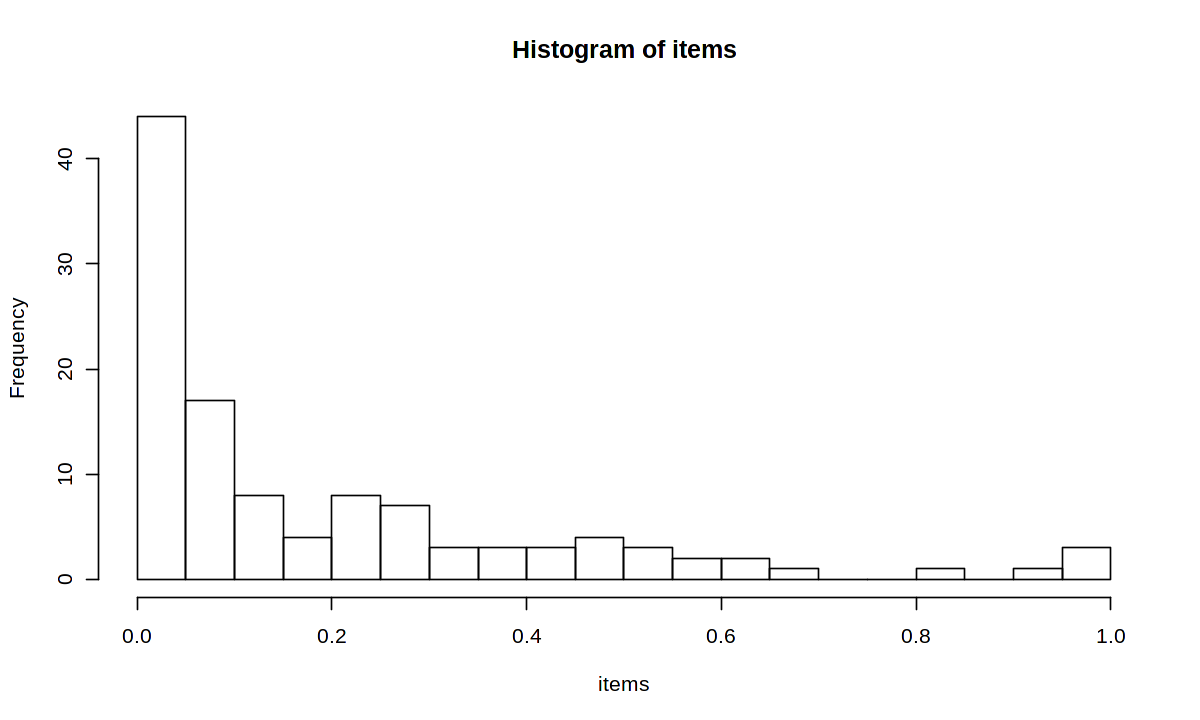

In [10]:
options(repr.plot.width = 10, repr.plot.height = 6)
hist(items,breaks = 20)

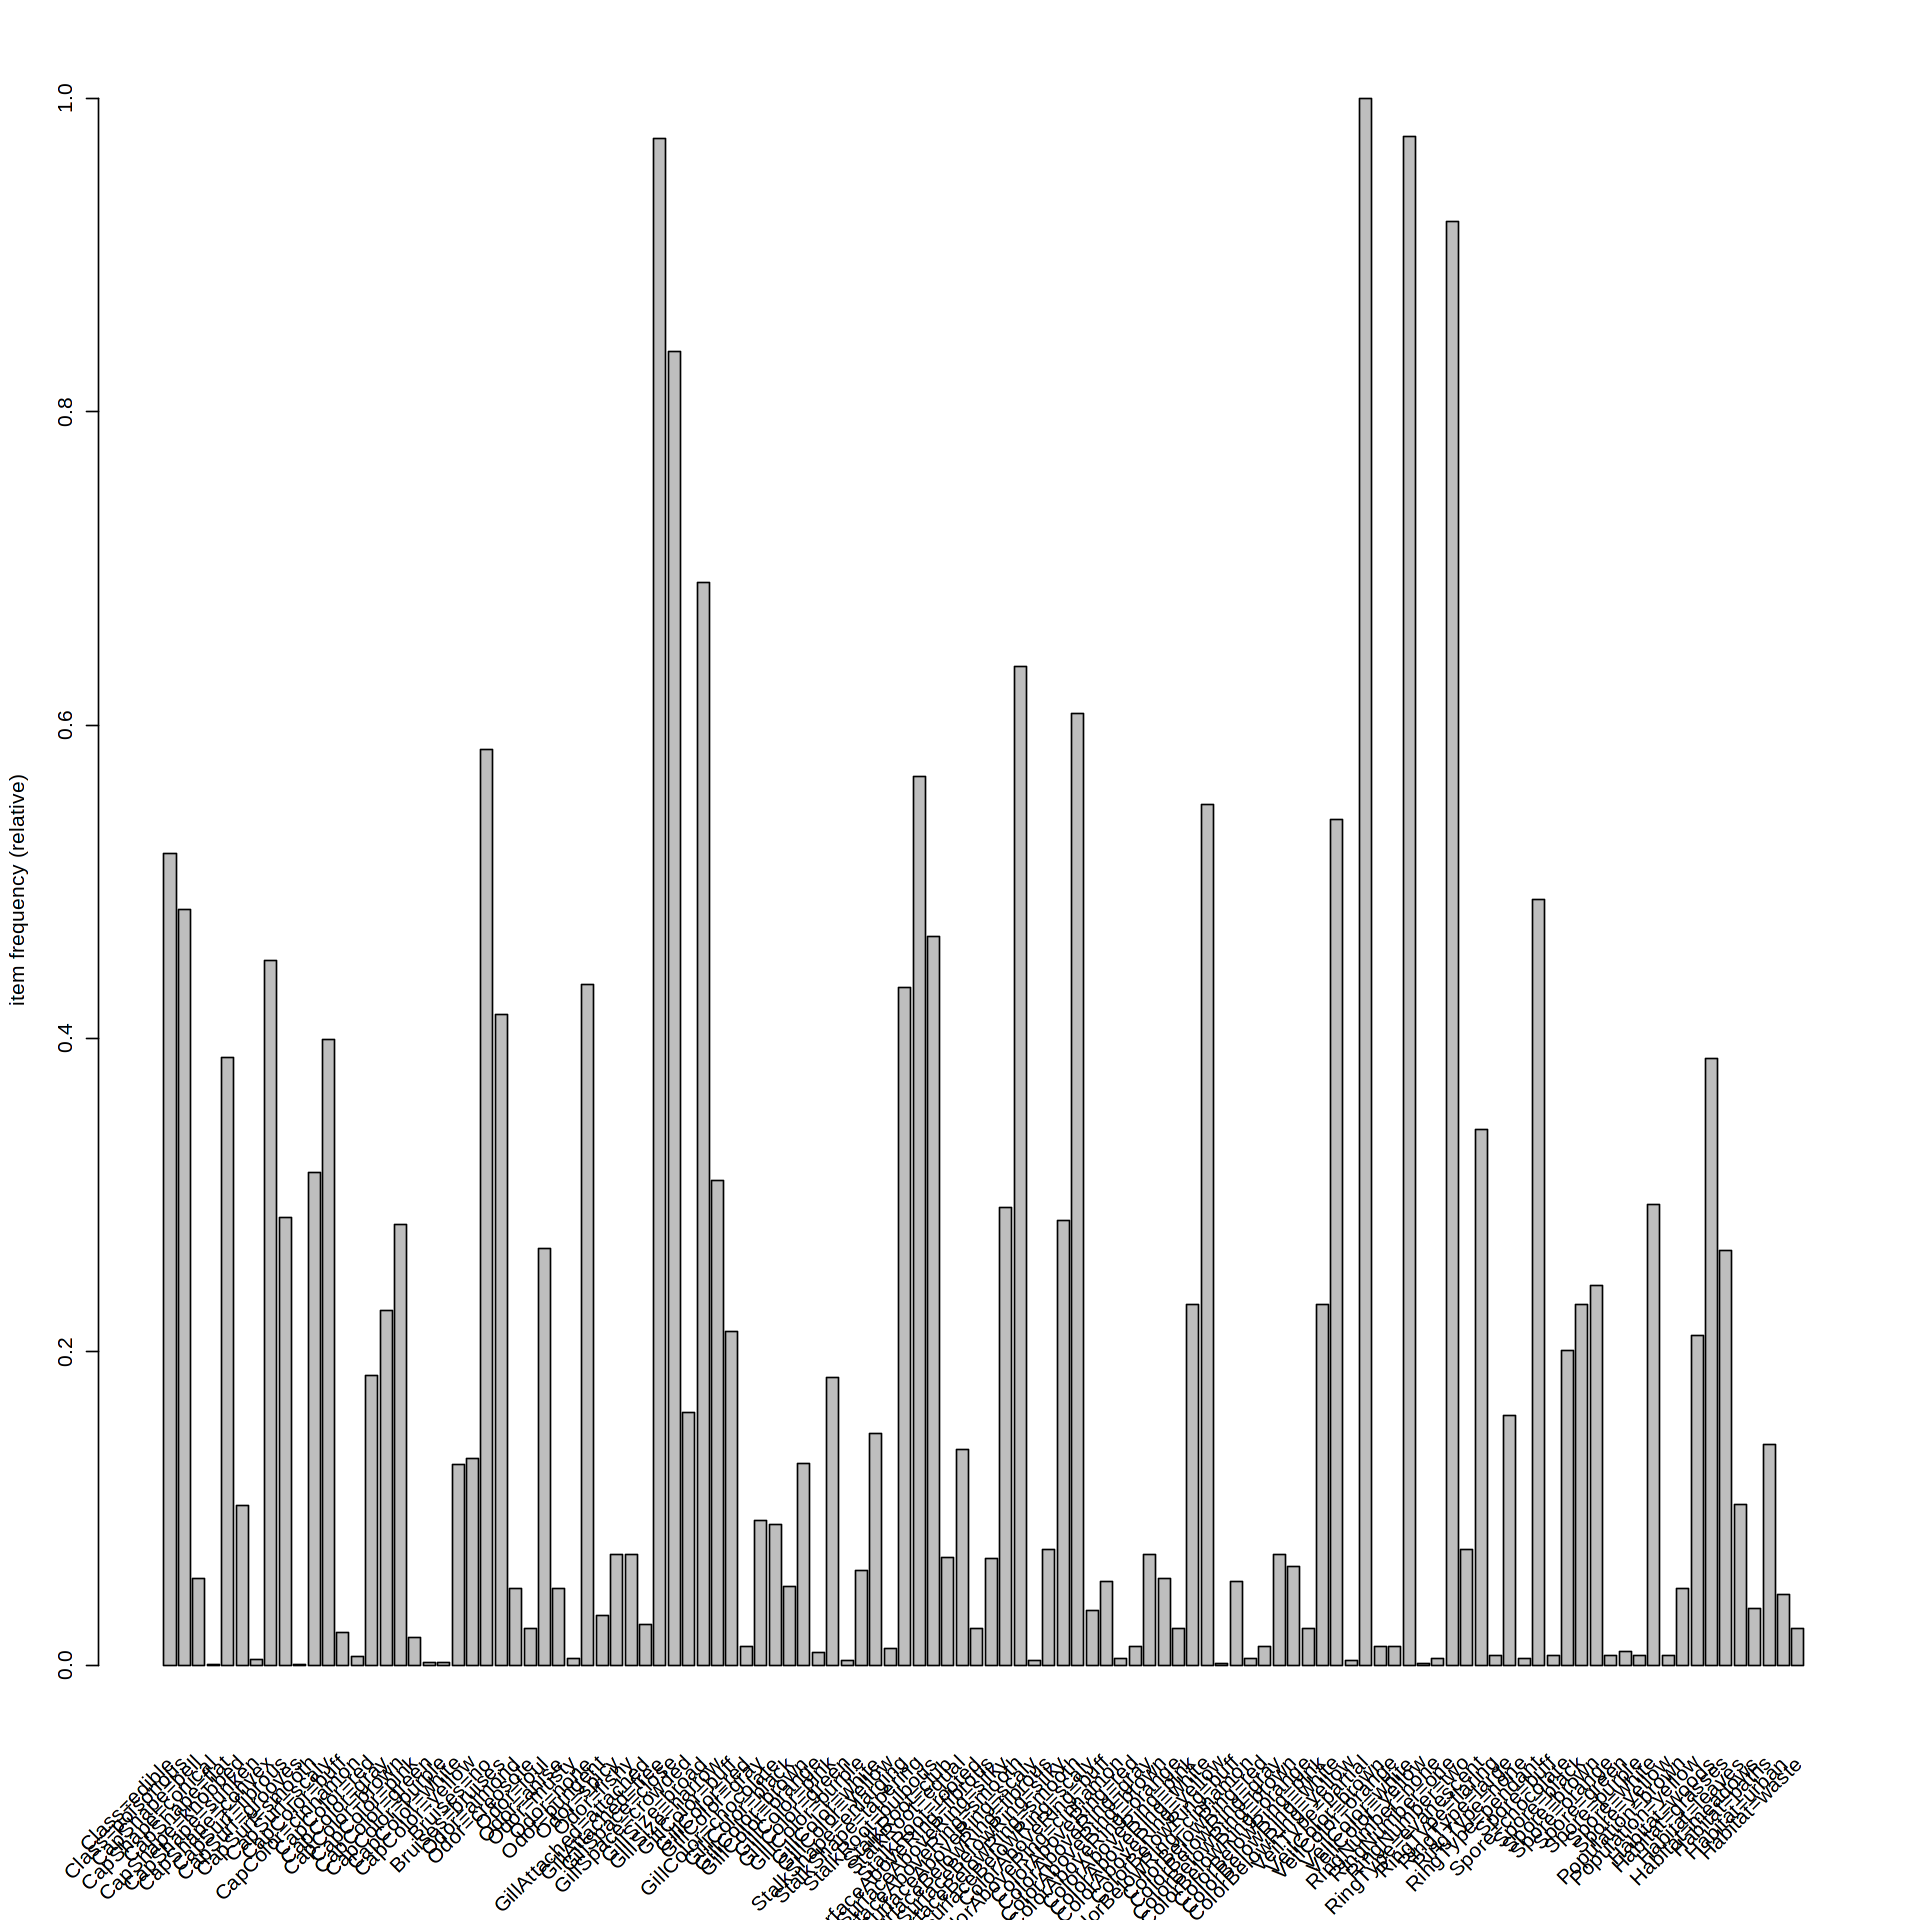

In [22]:
options(repr.plot.width = 16, repr.plot.height = 16)
itemFrequencyPlot(Mushroom)

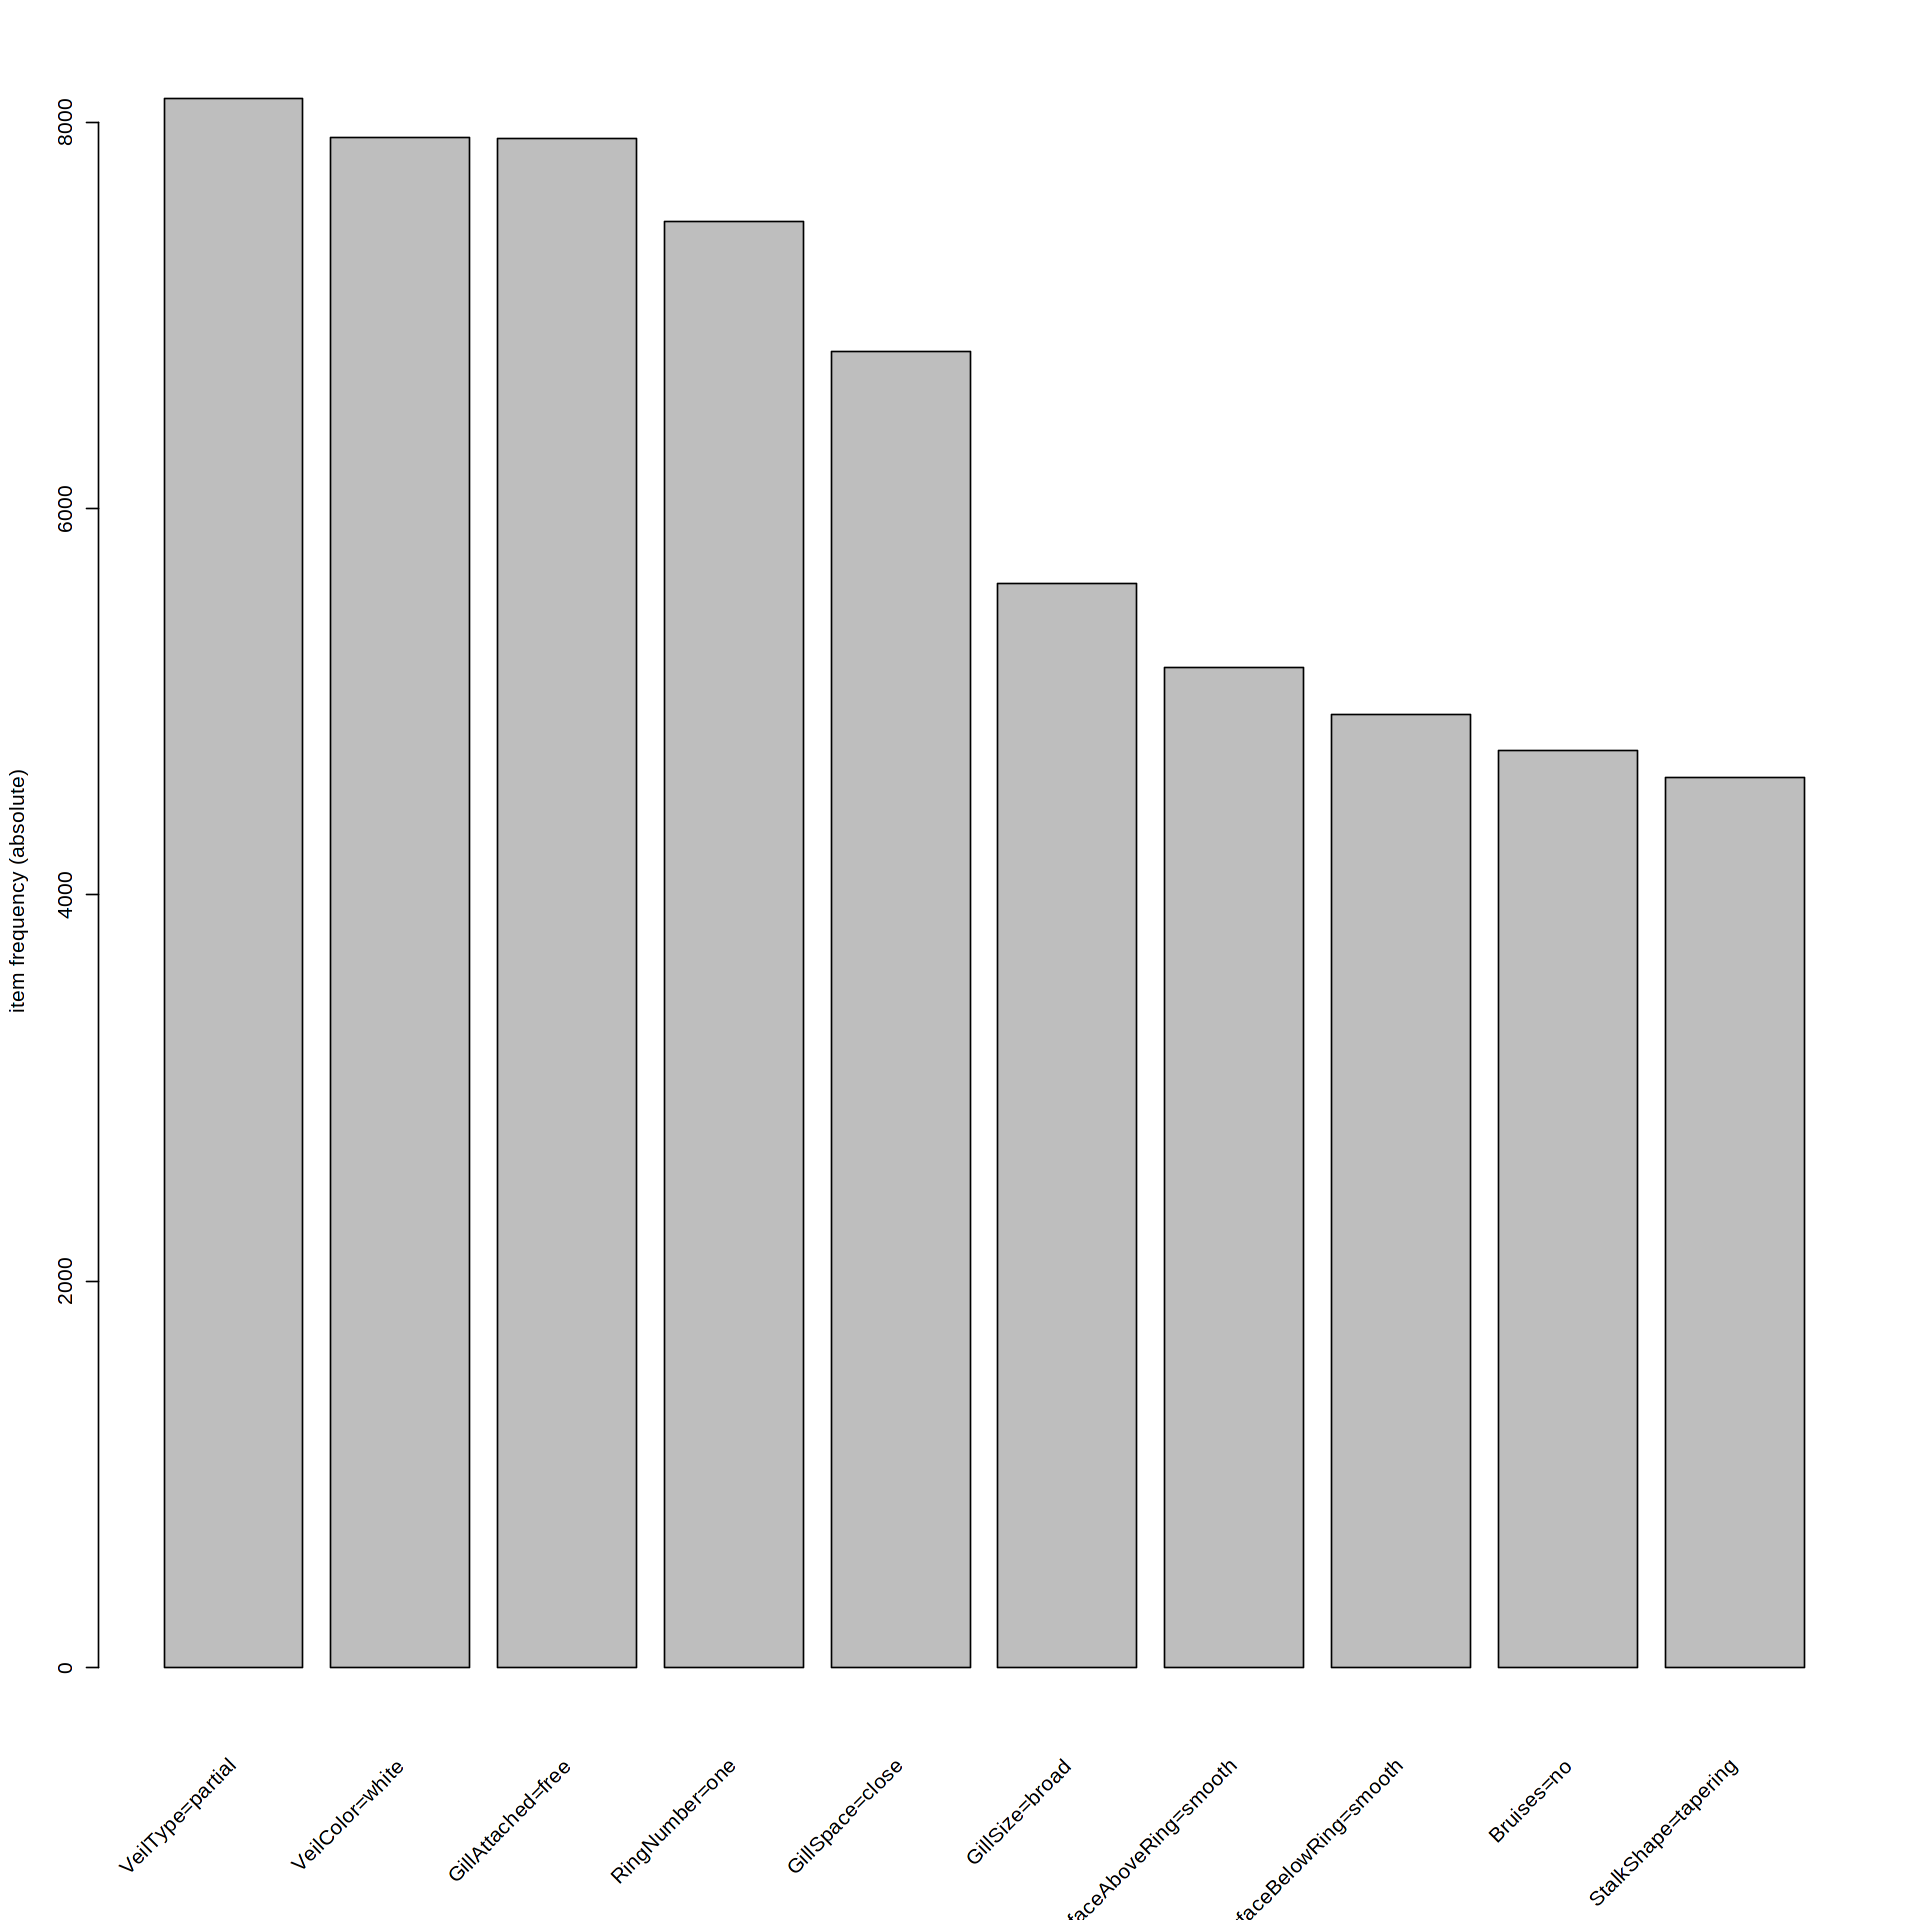

In [25]:
itemFrequencyPlot(Mushroom, topN=10, type="absolute")

In [27]:
### using the apriori algorithm
itemsets <- apriori(data = Mushroom)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 812 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [53 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(data = Mushroom):
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [3.53s].
writing ... [2142749 rule(s)] done [0.50s].
creating S4 object  ... done [1.34s].


In [31]:
## We can define how to retrieve the list of individual frequent items. For this we set minlen and maxlen to 1.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=1,maxlen=1,support=0.02,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen            target   ext
      1 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [84 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1

Warning message in apriori(data = Mushroom, parameter = list(minlen = 1, maxlen = 1, :
“Mining stopped (maxlen reached). Only patterns up to a length of 1 returned!”


 done [0.00s].
writing ... [84 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [32]:
## Lets see the first ten items with the highest support
inspect(head(sort(itemsets, by="support"),10))

     items                     support   count
[1]  {VeilType=partial}        1.0000000 8124 
[2]  {VeilColor=white}         0.9753816 7924 
[3]  {GillAttached=free}       0.9741507 7914 
[4]  {RingNumber=one}          0.9217134 7488 
[5]  {GillSpace=close}         0.8385032 6812 
[6]  {GillSize=broad}          0.6907927 5612 
[7]  {SurfaceAboveRing=smooth} 0.6371246 5176 
[8]  {SurfaceBelowRing=smooth} 0.6075825 4936 
[9]  {Bruises=no}              0.5844412 4748 
[10] {StalkShape=tapering}     0.5672083 4608 


In [33]:
itemsets

set of 84 itemsets 

In [34]:
## Now we will retrieve the list of frequent paired items. We set minlen and maxlen to 2.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=2,maxlen=2,support=0.02,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen            target   ext
      2 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [84 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2

Warning message in apriori(data = Mushroom, parameter = list(minlen = 2, maxlen = 2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.01s].
writing ... [1805 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [35]:
## And check the first ten item pairs with the highest support
inspect(head(sort(itemsets, by="support"),10))


     items                                support   count
[1]  {VeilType=partial,VeilColor=white}   0.9753816 7924 
[2]  {GillAttached=free,VeilType=partial} 0.9741507 7914 
[3]  {GillAttached=free,VeilColor=white}  0.9731659 7906 
[4]  {VeilType=partial,RingNumber=one}    0.9217134 7488 
[5]  {GillAttached=free,RingNumber=one}   0.8980798 7296 
[6]  {VeilColor=white,RingNumber=one}     0.8970950 7288 
[7]  {GillSpace=close,VeilType=partial}   0.8385032 6812 
[8]  {GillSpace=close,VeilColor=white}    0.8148695 6620 
[9]  {GillAttached=free,GillSpace=close}  0.8126539 6602 
[10] {GillSpace=close,RingNumber=one}     0.7956672 6464 


In [17]:
itemsets

set of 61 itemsets 

In [18]:
## Now we will retrieve the list of frequent triplet items. We set minlen and maxlen to 3.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=3,maxlen=3,support=0.02,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      3
 maxlen            target   ext
      3 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(data = Groceries, parameter = list(minlen = 3, maxlen = 3, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”

 done [0.01s].
writing ... [2 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [19]:
## And check the first ten item triplets with the highest support
inspect(head(sort(itemsets, by="support"),10))

    items                                         support    count
[1] {root vegetables,other vegetables,whole milk} 0.02318251 228  
[2] {other vegetables,whole milk,yogurt}          0.02226741 219  


In [20]:
itemsets

set of 2 itemsets 

In [21]:
## Now we will retrieve the list of frequent four-items. We set minlen and maxlen to 4.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=4,maxlen=4,support=0.02,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      4
 maxlen            target   ext
      4 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [0 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [22]:
## And check the first ten tetra-item with the highest support
inspect(head(sort(itemsets, by="support"),10))

In [23]:
itemsets

set of 0 itemsets 

As we can appreciate, the apriori algorithm, when set with a support threshold of 0.02, found 59 unique items, 61 paired itemsets and 2 triple-items. 
 
Now we will run the apriori algorithm to obtine a low support and high confidence model

In [24]:
rules <- apriori(data = Mushroom, parameter = list(support=0.001, confidence=0.6,target="rules"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [2918 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [25]:
inspect(head(sort(rules, by="lift"),10))

     lhs                        rhs                      support confidence      lift count
[1]  {Instant food products,                                                               
      soda}                  => {hamburger meat}     0.001220132  0.6315789 18.995654    12
[2]  {soda,                                                                                
      popcorn}               => {salty snack}        0.001220132  0.6315789 16.697793    12
[3]  {ham,                                                                                 
      processed cheese}      => {white bread}        0.001931876  0.6333333 15.045491    19
[4]  {tropical fruit,                                                                      
      other vegetables,                                                                    
      yogurt,                                                                              
      white bread}           => {butter}             0.001016777  0.6666667 12.0

In [26]:
strong_rules <- sort(rules, by="confidence", decreasing = T)
inspect(head(strong_rules,10))

     lhs                     rhs                    support confidence     lift count
[1]  {rice,                                                                          
      sugar}              => {whole milk}       0.001220132          1 3.913649    12
[2]  {canned fish,                                                                   
      hygiene articles}   => {whole milk}       0.001118454          1 3.913649    11
[3]  {root vegetables,                                                               
      butter,                                                                        
      rice}               => {whole milk}       0.001016777          1 3.913649    10
[4]  {root vegetables,                                                               
      whipped/sour cream,                                                            
      flour}              => {whole milk}       0.001728521          1 3.913649    17
[5]  {butter,                                         

In [27]:
strong_rules

set of 2918 rules 

As we can see, by setting a very low support (0.001) and a high confidence (0.6) we end up with almost 3000 different rules. 
 
The apriori algorithm will sometimes return dupplicate rules where some of the antecedents are ordered in different ways. As for our rules the order has no importance we have to detect and delete them.

In [28]:
redundant_rules <- is.redundant(strong_rules)
summary(redundant_rules)

   Mode   FALSE    TRUE 
logical    2714     204 

To remove the 204 redundant rules we proceed as follows:

In [29]:
strong_rules <- strong_rules[!redundant_rules]
strong_rules

set of 2714 rules 

In [30]:
strong_rules


set of 2714 rules 

Now, lets say that we are interested to see the items that were purchased with whole milk:

In [31]:
#rules <- apriori(data = Groceries, parameter = list(support=0.001, confidence=0.1),
#                appearance= list(default="rhs",lhs="hamburger meat"))
rules <- apriori(data = Mushroom, parameter = list(support=0.001, confidence=0.10,target="rules"),
                appearance= list(default="rhs",lhs="whole milk"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [24 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [32]:
rules

set of 24 rules 

In [33]:
inspect(head(sort(rules, by="lift"),15))

     lhs             rhs                     support    confidence lift    
[1]  {whole milk} => {butter}                0.02755465 0.1078392  1.946053
[2]  {whole milk} => {curd}                  0.02613116 0.1022682  1.919481
[3]  {whole milk} => {domestic eggs}         0.02999492 0.1173896  1.850203
[4]  {whole milk} => {whipped/sour cream}    0.03223183 0.1261441  1.759754
[5]  {whole milk} => {root vegetables}       0.04890696 0.1914047  1.756031
[6]  {whole milk} => {tropical fruit}        0.04229792 0.1655392  1.577595
[7]  {whole milk} => {yogurt}                0.05602440 0.2192598  1.571735
[8]  {whole milk} => {pip fruit}             0.03009659 0.1177875  1.557043
[9]  {whole milk} => {other vegetables}      0.07483477 0.2928770  1.513634
[10] {whole milk} => {pastry}                0.03324860 0.1301234  1.462587
[11] {whole milk} => {citrus fruit}          0.03050330 0.1193792  1.442377
[12] {whole milk} => {fruit/vegetable juice} 0.02663955 0.1042579  1.442160
[13] {whole 

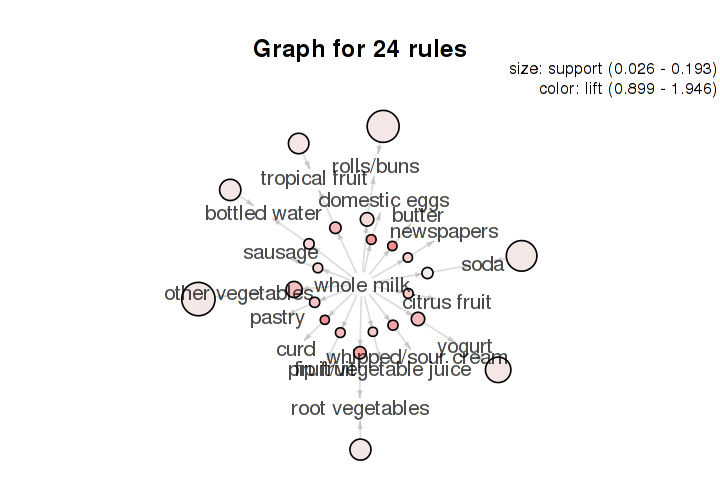

In [34]:
plot(rules, method="graph")